In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

In [45]:
#plot function
def race_plot(racedf, color):
    return plt.scatter(racedf.Place, racedf.Seconds, color=color)

#Heps Graphs

In [11]:
heps2010 = pd.read_csv('Old_Race_Results/2010_Heps.csv')
heps2008 = pd.read_csv('Old_Race_Results/2008_Heps.csv')
heps2007 = pd.read_csv('Old_Race_Results/2007_Heps.csv')
heps2006 = pd.read_csv('Old_Race_Results/2006_Heps.csv')
heps2005 = pd.read_csv('Old_Race_Results/2005_Heps.csv')
heps2004 = pd.read_csv('Old_Race_Results/2004_Heps.csv')
heps2003 = pd.read_csv('Old_Race_Results/2003_Heps.csv')
heps2002 = pd.read_csv('Old_Race_Results/2002_Heps.csv')
heps2001 = pd.read_csv('Old_Race_Results/2001_Heps.csv')
heps2000 = pd.read_csv('Old_Race_Results/2000_Heps.csv')
heps1999 = pd.read_csv('Old_Race_Results/1999_Heps.csv')
heps1998 = pd.read_csv('Old_Race_Results/1998_Heps.csv')

In [12]:
cutoff=75
heps2010 = heps2010[heps2010['Place'] <= cutoff]
heps2008 = heps2008[heps2008['Place'] <= cutoff]
heps2007 = heps2007[heps2007['Place'] <= cutoff]
heps2006 = heps2006[heps2006['Place'] <= cutoff]
heps2005 = heps2005[heps2005['Place'] <= cutoff]
heps2004 = heps2004[heps2004['Place'] <= cutoff]
heps2003 = heps2003[heps2003['Place'] <= cutoff]
heps2002 = heps2002[heps2002['Place'] <= cutoff]
heps2001 = heps2001[heps2001['Place'] <= cutoff]
heps2000 = heps2000[heps2000['Place'] <= cutoff]
heps1999 = heps1999[heps1999['Place'] <= cutoff]
heps1998 = heps1998[heps1998['Place'] <= cutoff]

(0, 85)

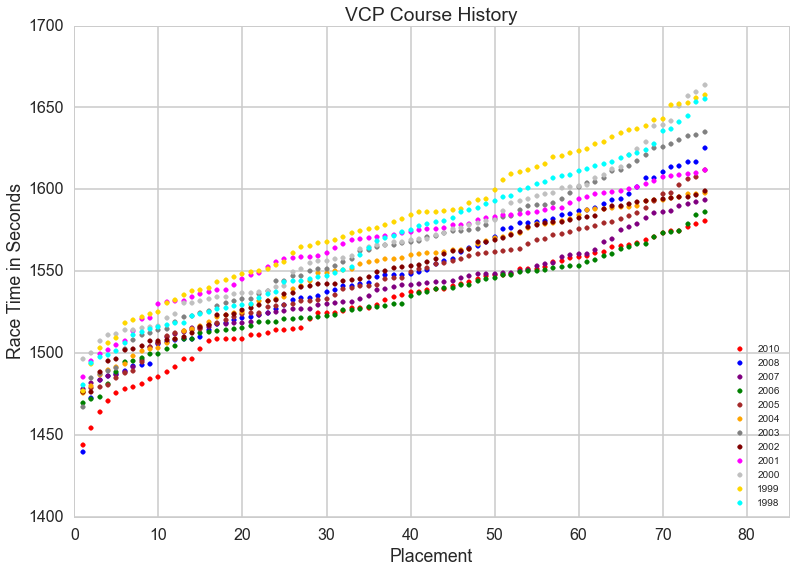

In [13]:
plot2010 = plt.scatter(heps2010.Place, heps2010.Seconds, color='r')
plot2008 = plt.scatter(heps2008.Place, heps2008.Seconds, color='blue')
plot2007 = plt.scatter(heps2007.Place, heps2007.Seconds, color='purple')
plot2006 = plt.scatter(heps2006.Place, heps2006.Seconds, color='g')
plot2005 = plt.scatter(heps2005.Place, heps2005.Seconds, color='brown')
plot2004 = plt.scatter(heps2004.Place, heps2004.Seconds, color='orange')
plot2003 = plt.scatter(heps2003.Place, heps2003.Seconds, color='gray')
plot2002 = plt.scatter(heps2002.Place, heps2002.Seconds, color='maroon')
plot2001 = plt.scatter(heps2001.Place, heps2001.Seconds, color='magenta')
plot2000 = plt.scatter(heps2000.Place, heps2000.Seconds, color='silver')
plot1999 = plt.scatter(heps1999.Place, heps1999.Seconds, color='gold')
plot1998 = plt.scatter(heps1998.Place, heps1998.Seconds, color='cyan')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.legend((plot2010, plot2008, plot2007, plot2006, plot2005, plot2004, plot2003, plot2002, plot2001, plot2000, plot1999,
           plot1998), ('2010', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998'),
    loc = 'lower right' , fontsize = 10
)
plt.title('VCP Course History')
plt.xlim(0, cutoff+10)

#Wisconsin

In [14]:
wisco2014 = pd.read_csv('Old_Race_Results/2014_Wisco.csv')
wisco2013 = pd.read_csv('Old_Race_Results/2013_Wisco.csv')
wisco2012 = pd.read_csv('Old_Race_Results/2012_Wisco.csv')
wisco2011 = pd.read_csv('Old_Race_Results/2011_Wisco.csv')
wisco2010 = pd.read_csv('Old_Race_Results/2010_Wisco.csv')

In [15]:
cutoff=200
wisco2014 = wisco2014[wisco2014['Place'] <= cutoff]
wisco2013 = wisco2013[wisco2013['Place'] <= cutoff]
wisco2012 = wisco2012[wisco2012['Place'] <= cutoff]
wisco2011 = wisco2011[wisco2011['Place'] <= cutoff]
wisco2010 = wisco2010[wisco2010['Place'] <= cutoff]

(0, 210)

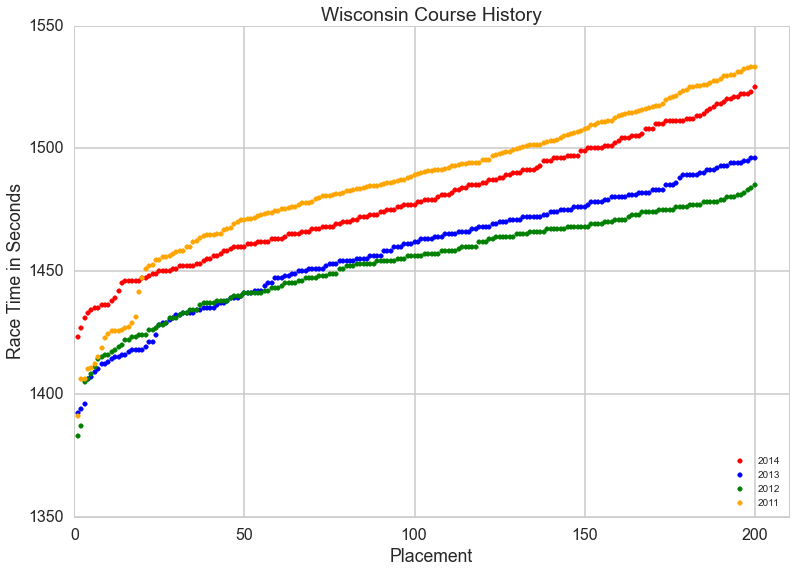

In [17]:
plot2014 = plt.scatter(wisco2014.Place, wisco2014.Seconds, color='r')
plot2013 = plt.scatter(wisco2013.Place, wisco2013.Seconds, color='blue')
plot2012 = plt.scatter(wisco2012.Place, wisco2012.Seconds, color='green')
plot2011 = plt.scatter(wisco2011.Place, wisco2011.Seconds, color='orange')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Wisconsin Course History')
plt.legend((plot2014, plot2013, plot2012, plot2011), ('2014', '2013', '2012', '2011'),
    loc = 'lower right' , fontsize = 10
)
plt.xlim(0,cutoff+10)

#Franklin Park 10K

In [18]:
ncaa_2005 = pd.read_csv('Old_Race_Results/2005_NCAA.csv')
ncaa_2007 = pd.read_csv('Old_Race_Results/2007_NCAA.csv')
ne_2015 = pd.read_csv('Old_Race_Results/2015_NE_FP.csv')
ne_2014 = pd.read_csv('Old_Race_Results/2014_NE_FP.csv')

In [23]:
cutoff=200
ncaa_2005 = ncaa_2005[ncaa_2005['Place'] <= cutoff]
ncaa_2007 = ncaa_2007[ncaa_2007['Place'] <= cutoff]
ne_2015 = ne_2015[ne_2015['Place'] <= cutoff]
ne_2014 = ne_2014[ne_2014['Place'] <= cutoff]

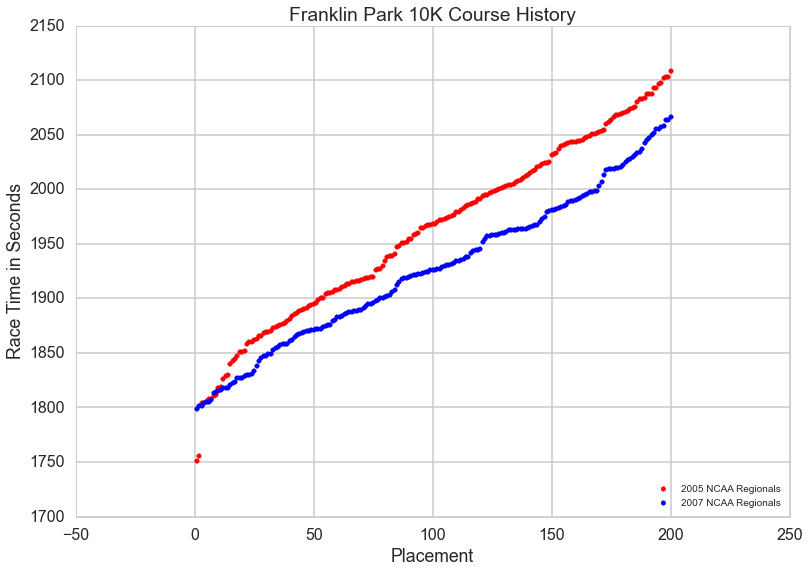

In [24]:
plot2005 = plt.scatter(ncaa_2005.Place, ncaa_2005.Seconds, color='r')
plot2007 = plt.scatter(ncaa_2007.Place, ncaa_2007.Seconds, color='blue')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Franklin Park 10K Course History')
plt.legend((plot2005, plot2007), ('2005 NCAA Regionals', '2007 NCAA Regionals'),
    loc = 'lower right' , fontsize = 10
)
#plt.xlim(0,cutoff+10)

#Goddard Park 8K

In [29]:
brown_2014 = pd.read_csv('Old_Race_Results/2014_Brown.csv')
brown_2013 = pd.read_csv('Old_Race_Results/2013_Brown.csv')
brown_2012 = pd.read_csv('Old_Race_Results/2012_Brown.csv')
brown_2010 = pd.read_csv('Old_Race_Results/2010_Brown.csv')

In [36]:
cutoff=30
brown_2014 = brown_2014[brown_2014['Place'] <= cutoff]
brown_2013 = brown_2013[brown_2013['Place'] <= cutoff]
brown_2012 = brown_2012[brown_2012['Place'] <= cutoff]
brown_2010 = brown_2010[brown_2010['Place'] <= cutoff]

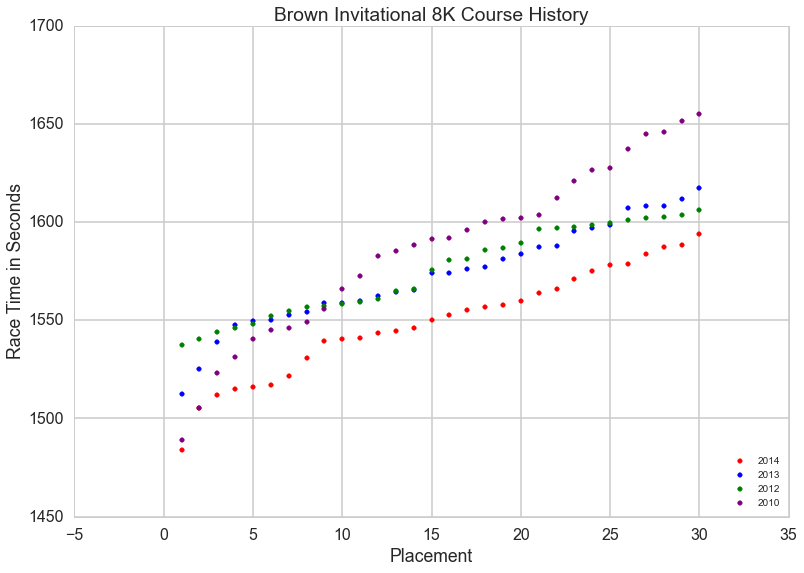

In [37]:
plot2014 = plt.scatter(brown_2014.Place, brown_2014.Seconds, color='r')
plot2013 = plt.scatter(brown_2013.Place, brown_2013.Seconds, color='blue')
plot2012 = plt.scatter(brown_2012.Place, brown_2012.Seconds, color='green')
plot2011 = plt.scatter(brown_2010.Place, brown_2010.Seconds, color='purple')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Brown Invitational 8K Course History')
plt.legend((plot2014, plot2013, plot2012, plot2011), ('2014', '2013', '2012', '2010'),
    loc = 'lower right' , fontsize = 10
)

#Franklin Park 8K

In [51]:
beantown_2014 = pd.read_csv('Old_Race_Results/2014_BoB.csv')
beantown_2013 = pd.read_csv('Old_Race_Results/2013_BoB.csv')
ne_2014 = pd.read_csv('Old_Race_Results/2014_NE.csv')
ne_2013 = pd.read_csv('Old_Race_Results/2013_NE.csv')
ne_2011 = pd.read_csv('Old_Race_Results/2011_NE.csv')
ne_2010 = pd.read_csv('Old_Race_Results/2010_NE.csv')

In [52]:
cutoff=200
beantown_2014 = beantown_2014[beantown_2014['Place'] <= cutoff]
beantown_2013 = beantown_2013[beantown_2013['Place'] <= cutoff]
ne_2014 = ne_2014[ne_2014['Place'] <= cutoff]
ne_2013 = ne_2013[ne_2013['Place'] <= cutoff]
ne_2011 = ne_2011[ne_2011['Place'] <= cutoff]
ne_2010 = ne_2010[ne_2010['Place'] <= cutoff]

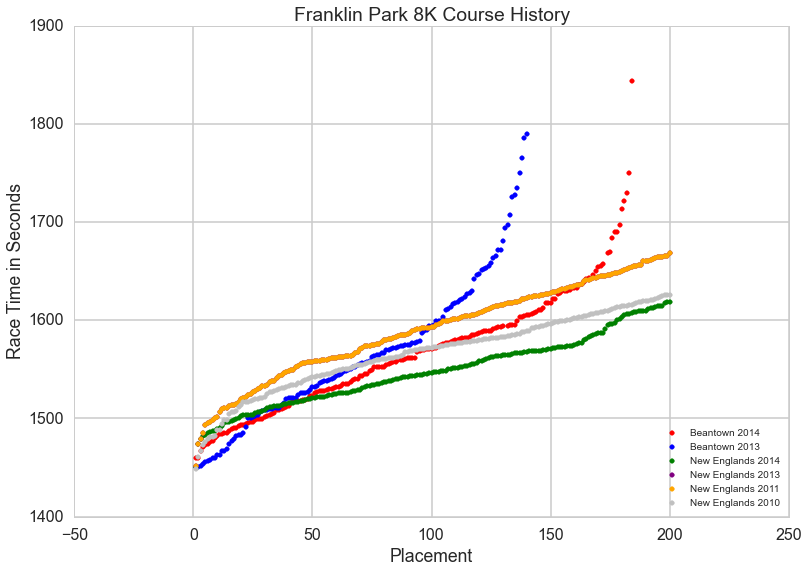

In [56]:
plot2014 = race_plot(beantown_2014, 'r')
plot2013 = race_plot(beantown_2013, 'blue')
plot_ne2014 = race_plot(ne_2014, 'green')
plot_ne2013 = race_plot(ne_2013, 'purple')
plot_ne2011 = race_plot(ne_2011, 'orange')
plot_ne2010 = race_plot(ne_2010, 'silver')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Franklin Park 8K Course History')
plt.legend((plot2014, plot2013, plot_ne2014, plot_ne2013, plot_ne2011, plot_ne2010), ('Beantown 2014', 'Beantown 2013', 
    'New Englands 2014', 'New Englands 2013', 'New Englands 2011', 'New Englands 2010'),
    loc = 'lower right' , fontsize = 10
)